In [1]:
import yaml, json
from glob import glob

In [9]:
# === Lungs segmentation == V2.0

postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/covid/'
experiment = '/*+dataset.dataset_rebalance_kwargs.segmented_part={part},*'

addr_scratch = prefix+'lungs_scratch_2021-11-22_18-11-33/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_scratch,attempts=*' + postfix
addr_sorting = prefix+'lungs_sorting_2021-11-*/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting,attempts=*' + postfix
addr_simclr = prefix+'lungs_simclr_2022-01-13_14-18-13/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_simclr,attempts=*' + postfix
addr_sorting_1GPU = prefix+'lungs_sorting_1GPU_2021-11-26_12-03-41/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting_1GPU,attempts=*' + postfix
addr_sorting_2GPU = prefix+'lungs_sorting_2GPU_2022-01-13_14-00-55/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_pfpn_sorting_2GPU,attempts=*' + postfix
addr_sorting_nonorm = prefix+'lungs_sorting_nonorm_2021-11-27_14-48-31/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_nonorm_harder = prefix+'lungs_sorting_nonorm_harder_2021-11-30_15-20-10/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix

addr_sorting_deeplabv3 = prefix+'lungs_sorting_2GPU_deeplab_2022-01-13_14-34-09/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_deeplabv3_sorting_2GPU,attempts=*'+postfix
addr_simclr_deeplabv3 = prefix+'lungs_simclr_deeplab_2022-01-13_14-38-17/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=lungs_randomized_deeplabv3_simclr,attempts=*'+postfix

addr_scratch_deeplabv3_short = prefix+'lungs_scratch_2GPU_deeplab_2022-01-14_18-03-22'+experiment+postfix
addr_simclr_deeplabv3_short = prefix+'lungs_simclr_deeplab_2022-01-14_18-03-32'+experiment+postfix
addr_sorting_deeplabv3_short = prefix+'lungs_sorting_2GPU_deeplab_2022-01-14_18-03-42'+experiment+postfix

addr_scratch_deeplabv3_50 = prefix+'lungs_scratch_deeplab-50_2022-01-17_17-04-04'+experiment+postfix
addr_simclr_deeplabv3_50 = prefix+'lungs_sorting_deeplab-50_2022-01-17_17-03-21'+experiment+postfix
addr_sorting_deeplabv3_50 = prefix+'lungs_sorting_deeplab-50_2022-01-17_17-04-35'+experiment+postfix

addr_scratch_deeplabv3_50 = prefix+'lungs_scratch_deeplab-50_2022-01-18_12-35-51'+experiment+postfix
addr_simclr_deeplabv3_50 = prefix+'lungs_simclr_deeplab-50_2022-01-18_14-39-13'+experiment+postfix
addr_sorting_deeplabv3_50 = prefix+'lungs_sorting_deeplab-50_2022-01-18_14-37-56'+experiment+postfix
addr_sorting_50_norm = prefix+'lungs_sorting_deeplab-50-norm_2022-01-18_15-42-26'+experiment+postfix
addr_sorting_50_norm_2 = prefix+'lungs_sorting_deeplab-50-norm_2022-01-19_14-54-37'+experiment+postfix
addr_sorting_50_norm_4 = prefix+'lungs_sorting_deeplab-50-norm_2022-01-19_14-55-08'+experiment+postfix




addresses = {
#     'simclr': addr_simclr,
#     'simclr-inside': addr_simclr2,
#     'none': addr_scratch, 
#     'sorting': addr_sorting,
#     'sorting-1GPU': addr_sorting_1GPU,
#     'sorting-2GPU': addr_sorting_2GPU,
#     'addr_sorting_nonorm': addr_sorting_nonorm,
#     'addr_sorting_nonorm_harder': addr_sorting_nonorm_harder
    
#     'sorting-2GPU-deeplab': addr_sorting_deeplabv3,
#     'simclr-deeplab': addr_simclr_deeplabv3,
    
#     'scratch-deeplab(short)': addr_scratch_deeplabv3_short,
#     'simclr-deeplab(short)': addr_simclr_deeplabv3_short,
#     'sorting-deeplab(short)': addr_sorting_deeplabv3_short,
    
    'scratch-deeplab(50)': addr_scratch_deeplabv3_50,
    'simclr-deeplab(50)': addr_simclr_deeplabv3_50,
    'sorting-deeplab(50)': addr_sorting_deeplabv3_50,
    'sorting-50(norm)': addr_sorting_50_norm,
    'sorting-50(norm2)': addr_sorting_50_norm_2,
    'sorting-50(norm4)': addr_sorting_50_norm_4,
}

all_partitions = ['1.0', '0.1', '0.01', '0.005']

In [123]:
# === Covid segmentation === V2.0

postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/covid/'
experiment = '/*+dataset.dataset_rebalance_kwargs.segmented_part={part},*'

addr_scratch = prefix+'covid_scratch_2021-11-24_10-29-59/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=covid_randomized_pfpn_scratch,attempts=*' + postfix
addr_sorting = prefix+'covid_sorting_2021-11-24_10-55-00/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=covid_randomized_pfpn_sorting,attempts=*' + postfix
addr_simclr = prefix+'covid_simclr_2021-11-24_11-00-34/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=covid_randomized_pfpn_simclr,attempts=*' + postfix
addr_sorting_nonorm = prefix+'covid_sorting_nonorm_2021-11-29_10-03-34/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_2GPU = prefix+'covid_sorting_2GPU_2021-11-29_11-19-58/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix
addr_sorting_nonorm_harder = prefix+'covid_sorting_nonorm_harder_2021-11-30_11-14-08/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+experiment=*,attempts=*' + postfix

addr_simclr_h = prefix+'covid_simclr_deeplab_2022-01-15_14-03-48'+experiment+postfix
addr_scratch_h = prefix+'covid_scratch_deeplab_2022-01-15_14-04-14'+experiment+postfix
addr_sorting_h = prefix+'covid_sorting_deeplab_2022-01-15_14-04-20'+experiment+postfix

addr_simclr_deeplab = prefix+'covid_simclr_deeplab_2022-01-14_12-23-54'+experiment+postfix
addr_scratch_deeplab = prefix+'covid_scratch_deeplab_2022-01-14_12-26-45'+experiment+postfix
addr_sorting_deeplab = prefix+'covid_sorting_deeplab_2022-01-14_12-27-01'+experiment+postfix

addr_simclr_pfpn = prefix+'covid_simclr_pfpn_2022-01-16_10-08-20'+experiment+postfix
addr_scratch_pfpn = prefix+'covid_scratch_pfpn_2022-01-16_10-08-59'+experiment+postfix
addr_sorting_pfpn = prefix+'covid_sorting_pfpn_2022-01-16_11-10-11'+experiment+postfix

addr_scratch_50 = prefix+'covid_scratch_deeplab-50_2022-01-16_18-02-21'+experiment+postfix
addr_sorting_50 = prefix+'covid_sorting_deeplab-50_2022-01-16_18-01-26'+experiment+postfix
addr_simclr_50 = prefix+'covid_simclr_deeplab-50_2022-01-17_16-00-10'+experiment+postfix

addr_scratch_50 = prefix+'covid_scratch_deeplab-50_2022-01-19_15-39-02'+experiment+postfix
addr_simclr_50 = prefix+'covid_simclr_deeplab-50_2022-01-19_15-39-49'+experiment+postfix
addr_sorting_50 = prefix+'covid_sorting_deeplab-50_2022-01-19_15-43-09'+experiment+postfix
addr_sorting_50_norm = prefix+'covid_sorting_deeplab-50-norm_2022-01-20_10-24-57'+experiment+postfix

addr_simclr_50_harder = prefix+'covid_simclr_deeplab-50_2022-01-27_08-36-12'+experiment+postfix
addr_sorting_50_harder = prefix+'covid_sorting_deeplab-50_2022-01-27_08-36-59'+experiment+postfix
addr_sorting_50_harder = prefix+'covid_sorting_deeplab-50_2022-01-27_12-30-00'+experiment+postfix
addr_simclr_50_inner = prefix+'covid_simclr_deeplab-50_2022-01-27_14-15-36'+experiment+postfix

addr_sorting_50_norm_2 = prefix+'covid_sorting_deeplab-50-norm_2022-02-11_11-13-05'+experiment+postfix
addr_sorting_50_norm_2 = prefix+'covid_sorting_deeplab-50-norm_2022-02-12_21-10-03'+experiment+postfix
addr_sorting_50_norm_4 = prefix+'covid_sorting_deeplab-50-norm_2022-02-11_11-13-39'+experiment+postfix

addr_simclr_50 = prefix+'covid_simclr_deeplab-50_2022-02-13_11-12-23'+experiment+postfix
addr_sorting_50 = prefix+'covid_sorting_deeplab-50-norm_2022-02-13_11-13-23'+experiment+postfix

addr_sorting_50 = prefix+'covid_sorting_deeplab-50-norm_2022-02-13_18-49-13'+experiment+postfix
addr_simclr_50 = prefix+'covid_simclr_deeplab-50_2022-02-13_18-49-08'+experiment+postfix


addresses = {
#     'simclr': addr_simclr,
# #     'simclr-inside': addr_simclr2,
#     'none': addr_scratch, 
# #     'sorting': addr_sorting,
# #     'addr_sorting_nonorm': addr_sorting_nonorm,
#     'addr_sorting_2GPU': addr_sorting_2GPU,
# #     'addr_sorting_nonorm_harder': addr_sorting_nonorm_harder
#     'simclr': addr_simclr,
#     'none': addr_scratch,
#     'sorting': addr_sorting_2GPU,
    
#     'deeplab-simclr': addr_simclr_deeplab,
#     'deeplab-none': addr_scratch_deeplab,
#     'deeplab-sorting': addr_sorting_deeplab,
    
#     'simclr-head': addr_simclr_h,
#     'none-head': addr_scratch_h,
#     'sorting-head': addr_sorting_h,
    
#     'simclr-pfpn': addr_simclr_pfpn,
#     'none-pfpn': addr_scratch_pfpn,
#     'sorting-pfpn': addr_sorting_pfpn,
    
    'none-50': addr_scratch_50,
    'sorting-50': addr_sorting_50,
    'sorting-50-norm': addr_sorting_50_norm,
    'sorting-50-norm2': addr_sorting_50_norm_2,
    'sorting-50-norm4': addr_sorting_50_norm_4,
    'simclr-50': addr_simclr_50,
#     'simclr-harder': addr_simclr_50_harder,
#     'sorting-harder': addr_sorting_50_harder,
#     'simclr-inner': addr_simclr_50_inner,
}


all_partitions = ['1.0', '0.1']

In [2]:
# === Medaka eyes small === V2.0

postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/medaka-supervised/'
experiment = '/*+dataset.dataset_rebalance_kwargs.segmented_part={part},*'


addr_simclr = prefix+'eyes_simclr_2022-01-14_17-58-20/'+experiment+postfix
addr_scratch = prefix+'eyes_scratch_2022-01-14_17-58-03/'+experiment+postfix
addr_sorting = prefix+'eyes_sorting_2022-01-14_17-58-15/'+experiment+postfix



addr_simclr2 = prefix+'simclr2_2021-11-11_08-39-12/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_simclr2,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix
addr_sorting_u = prefix+'sorting_u_2021-11-12_10-19-53/*_+dataset.dataset_rebalance_kwargs.segmented_part={part},+dataset=eyes_randomized,+model=eyes_pfpn_sorting_u,attempts=*,logger.project_name=null,sweep_prefix=*'+postfix

addresses = {
    'SimCLR': addr_simclr,
#     'simclr-inside': addr_simclr2,
    'None': addr_scratch, 
    'SortingLoss': addr_sorting,
#     'sorting-noncropped': addr_sorting_u
}

all_partitions = ['1.0', '0.1', '0.01']

In [67]:
# === Medaka eyes DeepLabV3+

postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/medaka-supervised/'
experiment = '/*+dataset.dataset_rebalance_kwargs.segmented_part={part}*'

addr_scratch = prefix+'deeplab_scratch_2022-01-25_21-29-51'+experiment+postfix
addr_sorting = prefix+'deeplab_sorted_2022-01-25_21-29-23'+experiment+postfix
addr_unet_scratch = prefix+'unet_scratch_2022-01-26_07-18-01'+experiment+postfix
addr_unet_sorted = prefix+'unet_sorted_2022-01-26_07-17-42'+experiment+postfix


addr_scratch_long = prefix+'deeplab_scratch_2022-01-29_11-16-06'+experiment+postfix
addr_sorting_long = prefix+'deeplab_sorted_2022-01-28_10-05-45'+experiment+postfix
addr_unet_scratch_long = prefix+'unet_scratch_2022-01-29_07-35-52'+experiment+postfix
addr_unet_sorted_long = prefix+'unet_sorted_2022-01-28_10-05-22'+experiment+postfix



addresses = {
    'deeplabv3-sorting': addr_sorting,
    'unet-none': addr_unet_scratch,
    'unet-sorting': addr_unet_sorted,
    'deeplabv3-none': addr_scratch, 
#     'DeepLabV3+/None': addr_scratch_long, 
#     'DeepLabV3+/SortingLoss': addr_sorting_long,
#     'U-Net/None': addr_unet_scratch_long,
#     'U-Net/SortingLoss': addr_unet_sorted_long
}

all_partitions = ['1.0', '0.1', '0.05']

In [142]:
# === Covid compare batches

postfix = '/logdir/checkpoints/_metrics.json'
prefix = '/home/ws/tb0536/logs/covid/covid_check_batchsize_2021-12-1*/'

experiment = '/*,checkpoint=*-50-bs-{part}'

addr_simclr = prefix+'*_+experiment=covid-check-batchsize,attempts=*,logger.project_name=null,model=fcovid_simclr-{part}*' + postfix
addr_sorting = prefix+'*_+experiment=covid-check-batchsize,attempts=*,logger.project_name=null,model=fcovid_sorting-{part}' + postfix

prefix = '/home/ws/tb0536/logs/covid/'

# addr_sorting = prefix+'lungs_deeplab-50-checkbs_2022-01-21_17-20-34'+experiment+postfix
# addr_simclr = prefix+'lungs_deeplab-50-checkbs_2022-01-21_17-21-46'+experiment+postfix

# addr_sorting = prefix+'lungs_deeplab-50-checkbs_2022-01-22_08-05-49'+experiment+postfix
# addr_simclr = prefix+'lungs_deeplab-50-checkbs_2022-01-22_08-05-39'+experiment+postfix

# addr_sorting = prefix+'lungs_deeplab-50-checkbs_2022-01-24_07-55-53'+experiment+postfix
# addr_simclr = prefix+'lungs_deeplab-50-checkbs_2022-01-24_16-59-48'+experiment+postfix

addr_sorting = prefix+'covid_deeplab-50-checkbs_2022-01-25_08-53-11'+experiment+postfix
addr_simclr = prefix+'covid_deeplab-50-checkbs_2022-01-25_08-53-03'+experiment+postfix

addr_sorting = prefix+'covid_deeplab-50-checkbs_2022-02-14_11-02-58'+experiment+postfix
addr_simclr = prefix+'covid_deeplab-50-checkbs_2022-02-14_11-02-48'+experiment+postfix

addr_sorting = prefix+'covid_deeplab-50-checkbs_2022-02-14_13-42-47'+experiment+postfix
addr_simclr = prefix+'covid_deeplab-50-checkbs_2022-02-14_13-42-42'+experiment+postfix

addresses = {
    'simclr': addr_simclr,
    'sorting': addr_sorting,
}

all_partitions = [8, 16, 24, 32]

In [79]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

In [4]:
def get_best_value_v1(metric_data):
    epochs = [k for k in metric_data.keys() if k.startswith('epoch_')]
    if len(epochs) > 0:
        return metric_data['best']['mean-iou']
    else:
        return None

def get_best_value_v2(metric_data):
    epochs = [k for k in metric_data.keys() if k.startswith('epoch_')]
    metrics = [metric_data[k][2]['mean-iou'] for k in epochs]
    if len(metrics) > 0:
        return np.max(metrics)
    else:
        return None

def get_best_value_v3(metric_data):
    epochs = [k for k in metric_data.keys() if k.startswith('epoch_')]
    metrics = [metric_data[k][2]['mean-iou'] for k in epochs]
    if len(metrics) > 0:
        return metrics[-1]
    else:
        return None
    
def get_best_value_v4(metric_data, metric_str='mean-iou', metric_range=[]):
    if 'last' in metric_data.keys():
        if 'valid' in metric_data['last'].keys():
            if metric_range:
                return np.mean([metric_data['last']['valid'][metric_str.format(i)] for i in metric_range])
            else:
                return metric_data['last']['valid'][metric_str]
    epochs = [k for k in metric_data.keys() if k.startswith('epoch_')]
    metrics = [metric_data[k][2]['mean-iou'] for k in epochs]
    if len(metrics) > 0:
        return metrics[-1]
    else:
        return None

In [114]:
addr_sorting

'/home/ws/tb0536/logs/covid/covid_deeplab-50-checkbs_2022-01-25_08-53-11/*,checkpoint=*-50-bs-{part}/logdir/checkpoints/_metrics.json'

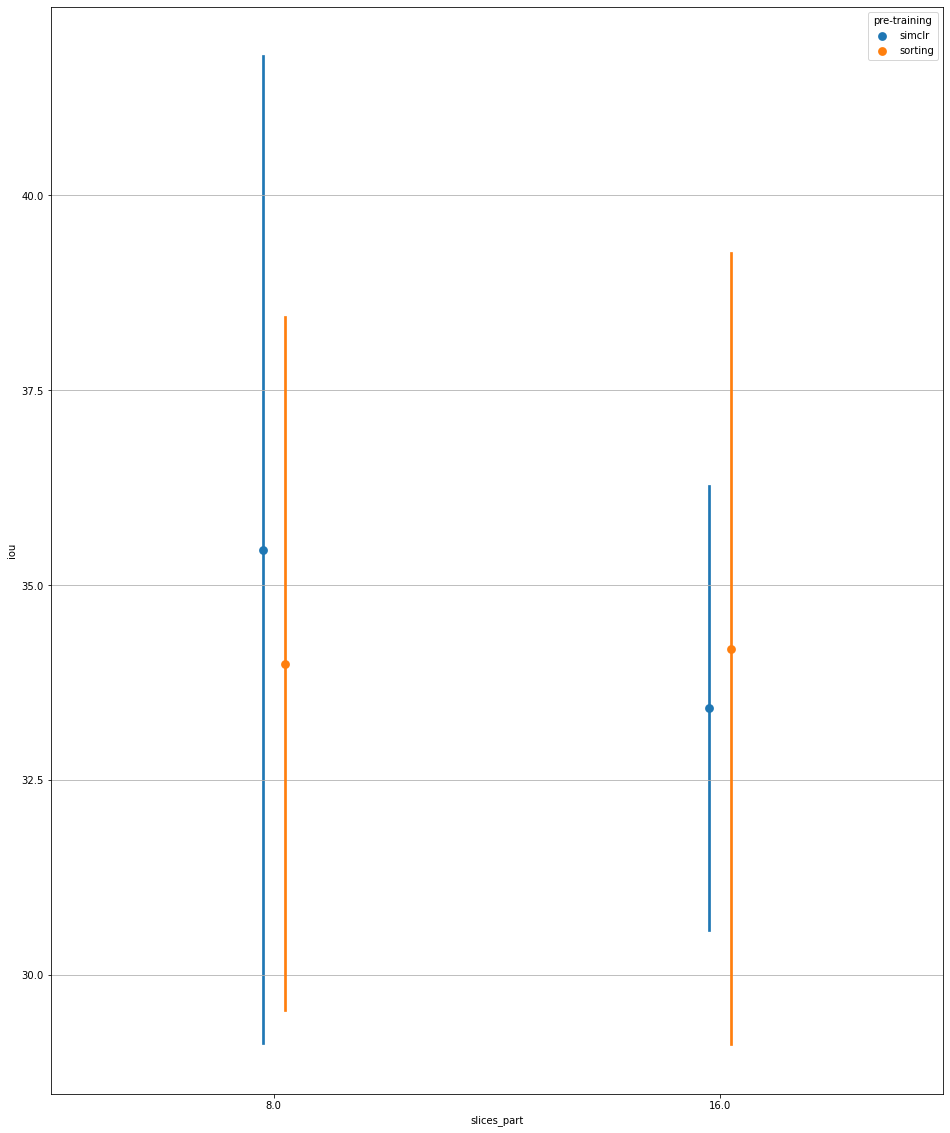

In [146]:
all_runs = []
for name, address in addresses.items():
    if isinstance(address, list):
        addresses_local = address
    else:
        addresses_local = [address]
    for address in addresses_local:
        for slc_partition in all_partitions:
            all_metrics = glob(address.format(part=slc_partition))
            for metric in all_metrics:
                with open(metric) as f:
                    metric_data = json.load(f)
                current_measure = {'pre-training': name, 
                                   'slices_part': float(slc_partition), 
#                                    'iou': get_best_value_v4(metric_data, 'iou-{}', [1, 3, 4, 5, 6])
                                   'iou': get_best_value_v4(metric_data, 'iou-{}', [1])
                                  }
#                 try:
#                     current_measure['func'] = [metric_data[f'epoch_{i}'][2]['mean-iou'] for i in range(50)]
#                 except KeyError:
#                     current_measure['func'] = None
#                     current_measure['iou'] = None
                all_runs.append(current_measure)

all_runs = pd.DataFrame(all_runs)

plt.figure(figsize=(16, 20))
sns.pointplot(data=all_runs, x='slices_part',y='iou', hue='pre-training', 
              dodge=True, join=False, ci='sd', estimator=np.mean)
# sns.swarmplot(data=all_runs, x='slices_part',y='iou', hue='pre-training')
loc = plticker.MultipleLocator(base=2.5) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()

In [88]:
np.mean([60.3, 92.6, 68.5, 58.1, 94.4])

74.78

In [38]:
def to_ticker(partition):
    percent = float(partition)*100
    if percent % 1 == 0:
        return int(percent)
    else:
        return percent

In [39]:
all_runs = []
for name, address in addresses.items():
    if isinstance(address, list):
        addresses_local = address
    else:
        addresses_local = [address]
    for address in addresses_local:
        for slc_partition in all_partitions:
            all_metrics = glob(address.format(part=slc_partition))
            for metric in all_metrics:
                with open(metric) as f:
                    metric_data = json.load(f)
                current_measure = {
                                   'model': name.split('/')[0],
                                   'pre-training': name.split('/')[1], 
                                   'Slices, %': float(slc_partition)*100, 
                                   'IoU': get_best_value_v4(metric_data, 'iou-{}', [1, 3, 4, 5, 6])}
                all_runs.append(current_measure)

all_runs = pd.DataFrame(all_runs)

plt.figure(figsize=(6, 5))
# sns.pointplot(data=all_runs, x='slices_part',y='iou', hue='pre-training', 
#               dodge=True, join=False, estimator=np.mean, ci=None)
# sns.swarmplot(data=all_runs, x='slices_part',y='iou', hue='pre-training')
grid = sns.lineplot(data=all_runs, 
                    x='Slices, %', y='IoU', hue='model', 
                    style='pre-training', 
                    ci=None, estimator=np.mean)
grid.set(xscale="log")
loc = plticker.MultipleLocator(base=1) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.xticks([to_ticker(i) for i in all_partitions], [to_ticker(i) for i in all_partitions])
plt.savefig('current_plot.pdf', dpi=300)
plt.show()

IndexError: list index out of range

In [125]:
mean_runs = all_runs.groupby(['pre-training', 'slices_part'])
mean_runs = mean_runs.apply(lambda x: f'${x.iou.mean():.1f} \pm {x.iou.std():.1f}$') #  \pm {x.iou.std():.1f}
mean_runs = mean_runs.unstack(1)

mean_runs

slices_part,0.1,1.0
pre-training,,
none-50,$18.6 \pm 4.6$,$34.4 \pm 7.5$
simclr-50,$18.6 \pm 5.9$,$35.7 \pm 5.1$
sorting-50,$19.2 \pm 7.8$,$35.2 \pm 4.5$
sorting-50-norm,$14.9 \pm 2.6$,$30.3 \pm 2.8$
sorting-50-norm2,$23.1 \pm 4.3$,$32.4 \pm 10.5$
sorting-50-norm4,$19.5 \pm 6.8$,$35.8 \pm 6.6$


In [24]:
addresses

{'DeepLabV3+/None': '/home/ws/tb0536/logs/medaka-supervised/deeplab_scratch_2022-01-29_11-16-06/*+dataset.dataset_rebalance_kwargs.segmented_part={part}*/logdir/checkpoints/_metrics.json',
 'DeepLabV3+/SortingLoss': '/home/ws/tb0536/logs/medaka-supervised/deeplab_sorted_2022-01-28_10-05-45/*+dataset.dataset_rebalance_kwargs.segmented_part={part}*/logdir/checkpoints/_metrics.json',
 'U-Net/None': '/home/ws/tb0536/logs/medaka-supervised/unet_scratch_2022-01-29_07-35-52/*+dataset.dataset_rebalance_kwargs.segmented_part={part}*/logdir/checkpoints/_metrics.json',
 'U-Net/SortingLoss': '/home/ws/tb0536/logs/medaka-supervised/unet_sorted_2022-01-28_10-05-22/*+dataset.dataset_rebalance_kwargs.segmented_part={part}*/logdir/checkpoints/_metrics.json'}

In [7]:
addresses

{'SimCLR': '/home/ws/tb0536/logs/medaka-supervised/eyes_simclr_2022-01-14_17-58-20//*+dataset.dataset_rebalance_kwargs.segmented_part={part},*/logdir/checkpoints/_metrics.json',
 'None': '/home/ws/tb0536/logs/medaka-supervised/eyes_scratch_2022-01-14_17-58-03//*+dataset.dataset_rebalance_kwargs.segmented_part={part},*/logdir/checkpoints/_metrics.json',
 'SortingLoss': '/home/ws/tb0536/logs/medaka-supervised/eyes_sorting_2022-01-14_17-58-15//*+dataset.dataset_rebalance_kwargs.segmented_part={part},*/logdir/checkpoints/_metrics.json'}

In [27]:
glob(addresses['None'].format(part='1.0'))[1]

'/home/ws/tb0536/logs/medaka-supervised/eyes_scratch_2022-01-14_17-58-03/0_+dataset.dataset_rebalance_kwargs.segmented_part=1.0,+experiment=eye-rand-scratch,attempts=0/logdir/checkpoints/_metrics.json'

In [12]:
all_runs['pre-training'].unique()

array(['scratch-deeplab(50)', 'simclr-deeplab(50)', 'sorting-deeplab(50)',
       'sorting-50(norm)', 'sorting-50(norm2)', 'sorting-50(norm4)'],
      dtype=object)

In [19]:
all_runs.iloc[all_runs['iou'].argmax()]

pre-training    sorting-deeplab(50)
slices_part                     1.0
iou                       96.852443
Name: 40, dtype: object

In [20]:
ptm = 'sorting-deeplab(50)'
slcpt = 1.0

seled = all_runs[(all_runs['pre-training'] == ptm) & (all_runs['slices_part'] == slcpt)]
# amin = (seled.iou - seled.iou.mean()).abs().argmin()
amin = seled.iou.argmax()
amin, seled.iou.values[amin]

(1, 96.85244298033652)

In [21]:
glob(addresses[ptm].format(part=str(slcpt)))[amin]

'/home/ws/tb0536/logs/covid/lungs_sorting_deeplab-50_2022-01-18_14-37-56/8_+dataset.dataset_rebalance_kwargs.segmented_part=1.0,+experiment=lungs_randomized_deeplabv3-50_sorting,attempts=2/logdir/checkpoints/_metrics.json'

In [23]:
import tifffile

In [37]:
img = tifffile.imread('/mnt/LSDF/users/zharov/CTLungs/images/0.tiff')
prd = tifffile.imread('/mnt/LSDF/users/zharov/CTLungs/predictions/0.tiff')
msk = tifffile.imread('/mnt/LSDF/users/zharov/CTLungs/masks/0.tiff')

In [44]:
from skimage.segmentation import mark_boundaries

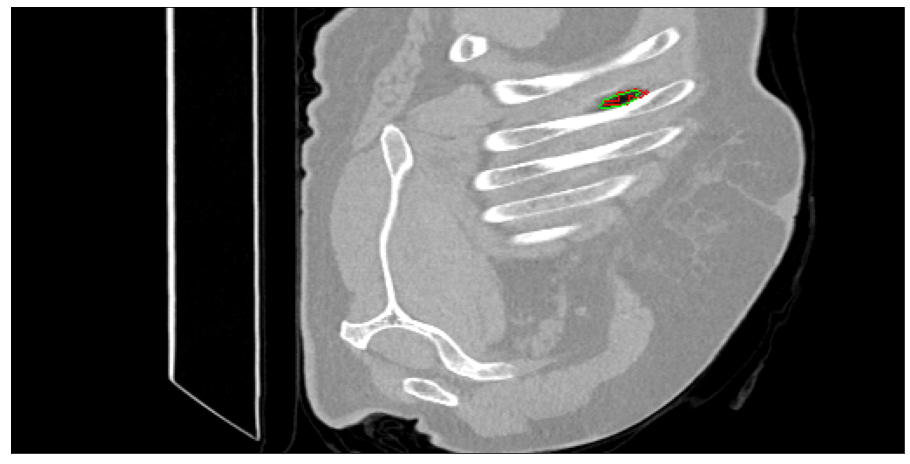

In [76]:
# slicer = (slice(80,180), slice(220, 320), 330)
slicer = (slice(None), slice(None), 420)
immo = img[slicer]
immo = mark_boundaries(immo, msk[slicer], (1, 0, 0))
immo = mark_boundaries(immo, prd[slicer], (0, 1, 0))
plt.figure(figsize=(16, 10))
plt.imshow(immo)
plt.xticks([])
plt.yticks([])
plt.show()

In [28]:
seled.iou - seled.iou.mean()

13    1.402839
14    0.495737
15   -0.641141
16   -1.952615
17    0.695181
Name: iou, dtype: float64

In [45]:
print(mean_runs.to_markdown())

| pre-training   | 0.01           | 0.1            | 1.0            |
|:---------------|:---------------|:---------------|:---------------|
| None           | $57.4 \pm 3.4$ | $69.2 \pm 1.2$ | $69.3 \pm 1.3$ |
| SimCLR         | $58.5 \pm 3.9$ | $67.6 \pm 1.0$ | $67.9 \pm 2.0$ |
| SortingLoss    | $59.0 \pm 3.2$ | $68.8 \pm 1.8$ | $69.9 \pm 0.9$ |


In [53]:
print(mean_runs.to_latex())

\begin{tabular}{llll}
\toprule
slices\_part &            0.05 &            0.10 &            1.00 \\
pre-training &                 &                 &                 \\
\midrule
none         &  \$57.5 \textbackslash pm 3.1\$ &  \$66.8 \textbackslash pm 1.2\$ &  \$74.2 \textbackslash pm 0.8\$ \\
sorting      &  \$65.3 \textbackslash pm 1.3\$ &  \$70.7 \textbackslash pm 0.1\$ &  \$74.6 \textbackslash pm 0.6\$ \\
unet-none    &  \$52.4 \textbackslash pm 4.0\$ &  \$61.3 \textbackslash pm 2.3\$ &  \$77.6 \textbackslash pm 0.5\$ \\
unet-sorting &  \$64.9 \textbackslash pm 0.0\$ &  \$72.7 \textbackslash pm 0.2\$ &  \$77.7 \textbackslash pm 1.5\$ \\
\bottomrule
\end{tabular}



In [296]:
from sklearn.model_selection import train_test_split

In [350]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b = np.array(a)
c = [(str(i), float(i)) for i in a]

In [359]:
from src.datasets import sklearn_train_test_split

In [384]:
import sklearn

In [393]:
aq = sklearn.utils.check_random_state(None)

In [399]:
aq.randint(10)

9

In [391]:
sklearn_train_test_split((a,c), random_state=None, train_volumes=2)

([(8, ('8', 8.0)), (9, ('9', 9.0))],
 [(5, ('5', 5.0)),
  (6, ('6', 6.0)),
  (1, ('1', 1.0)),
  (10, ('10', 10.0)),
  (7, ('7', 7.0)),
  (4, ('4', 4.0)),
  (3, ('3', 3.0)),
  (2, ('2', 2.0))])

In [135]:
from collections import defaultdict
from functools import partial

In [153]:
def _first_touch(sequence, thr):
    sequence = np.array(sequence)
    is_touched = np.where(sequence > thr)[0]
    if len(is_touched) > 0:
        return is_touched[0]
    else:
        return None

def _last_touch(sequence, thr):
    sequence = np.array(sequence)
    is_touched = np.where(sequence < thr)[0]
    if len(is_touched) > 0:
        return is_touched[-1]
    else:
        return None

In [216]:
all_runs = all_runs.dropna()

In [208]:
slices_part = 0.1
selected_source = all_runs[(all_runs['pre-training'] == 'none') & (all_runs['slices_part'] == slices_part)]
selected_target = all_runs[(all_runs['pre-training'] == 'simclr') & (all_runs['slices_part'] == slices_part)]

thr = selected_source.func.apply(lambda x: x[-1]).median()

print(selected_target.func.apply(partial(_first_touch, thr=thr)).median())
print(selected_target.func.apply(partial(_last_touch, thr=thr)).median())

22.0
41.0


In [46]:
prefix = '/home/ws/tb0536/logs/medaka-supervised/'
postfix = '/logdir/logs/{dataset_type}.csv'
# addr_base = 'None_2022-01-07_20-26-42/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced'
# addr_base = 'None_2022-01-08_08-02-04/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced'
# addr_base = 'None_2022-01-09_19-34-42/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced'
# addr_base = 'None_2022-01-10_12-30-07/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced'
# addr_5 = 'unet_presliced_5_2022-01-10_22-32-46/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_5,attempts=*'
# addr_10 = 'unet_presliced_10_2022-01-10_22-32-41/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_10,attempts=*'
# addr_20 = 'unet_presliced_20_2022-01-10_22-32-54/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_20,attempts=*'
addr_10 = 'unet_presliced_10_2022-01-11_22-34-06/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_10,attempts=*'
addr_20 = 'unet_presliced_20_2022-01-11_22-33-26/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_20,attempts=*'
addr_5 = 'unet_presliced_5_2022-01-11_22-33-58/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_5,attempts=*'
addr_5_n = 'unet_presliced_5_2022-01-12_08-43-44/*_+dataset.train_test_split_kwargs.train_volumes={volumes},+experiment=eye-large-sorted-unet-presliced_5,attempts=*'

In [57]:
all_ious = [f'iou-{i}' for i in [1, 3, 4, 5, 6]]

In [58]:
dict_5 = []

for v in [1,3,5,10,15]:
    for spacer, cur_addr in zip([5, 5, 10, 20], [addr_5, addr_5_n, addr_10, addr_20]):
        try:
            inter_addrs = glob((prefix+cur_addr+postfix).format(volumes=v, dataset_type='infer_interpolation'))
            extra_addrs = glob((prefix+cur_addr+postfix).format(volumes=v, dataset_type='infer_extrapolation'))
            for inter_addr, extra_addr in zip(inter_addrs, extra_addrs):
                dict_5.append({'volumes': v, 'spacer': spacer,
                               'dataset': 'interpolation',
                               'iou': pd.read_csv(inter_addr)[all_ious].values.mean()})
                dict_5.append({'volumes': v, 'spacer': spacer,
                               'dataset': 'extrapolation',
                               'iou': pd.read_csv(extra_addr)[all_ious].values.mean()})

        except:
            pass

In [79]:
biomedisa_qualities = {20: 74.2, 10: 76.1, 5: 76.5}
zero_order_qualities = {5: 81.1, 10: 67.3, 20: 49.3}

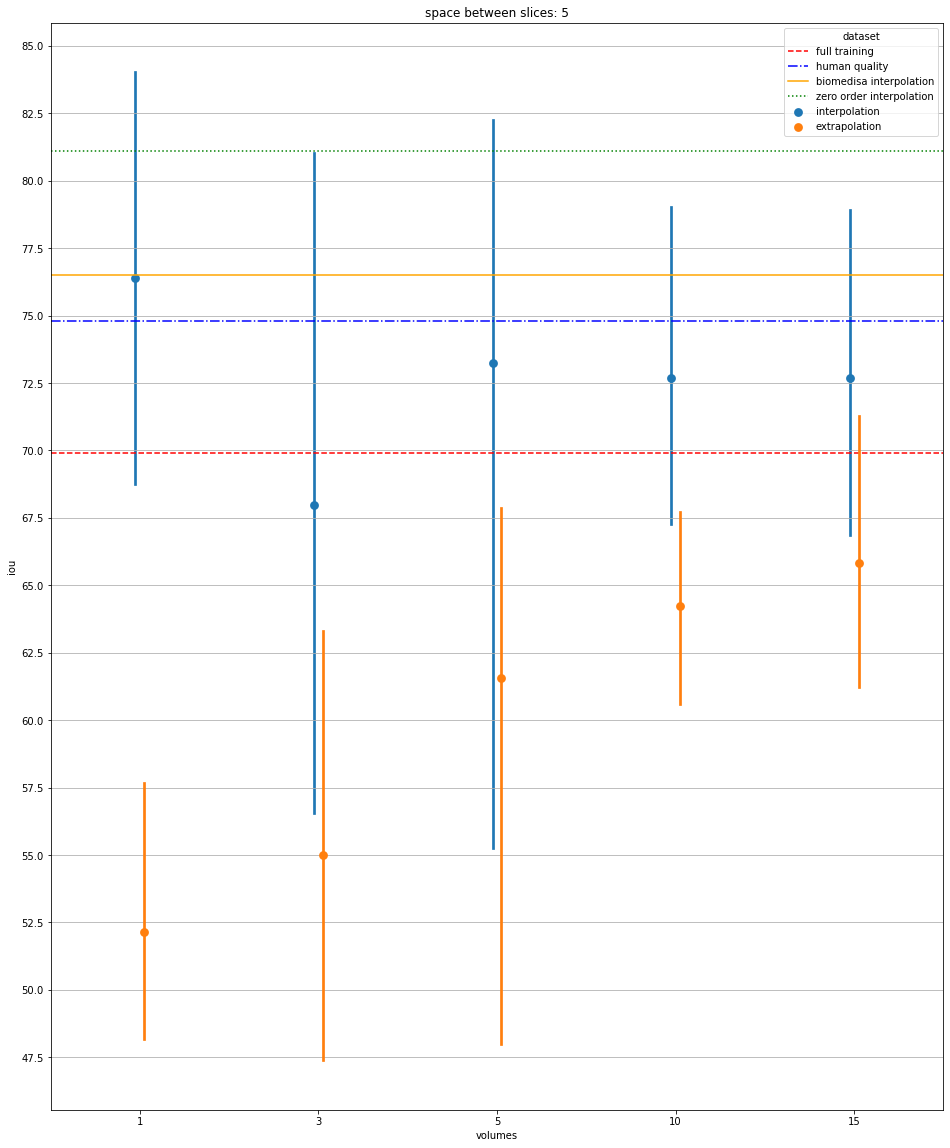

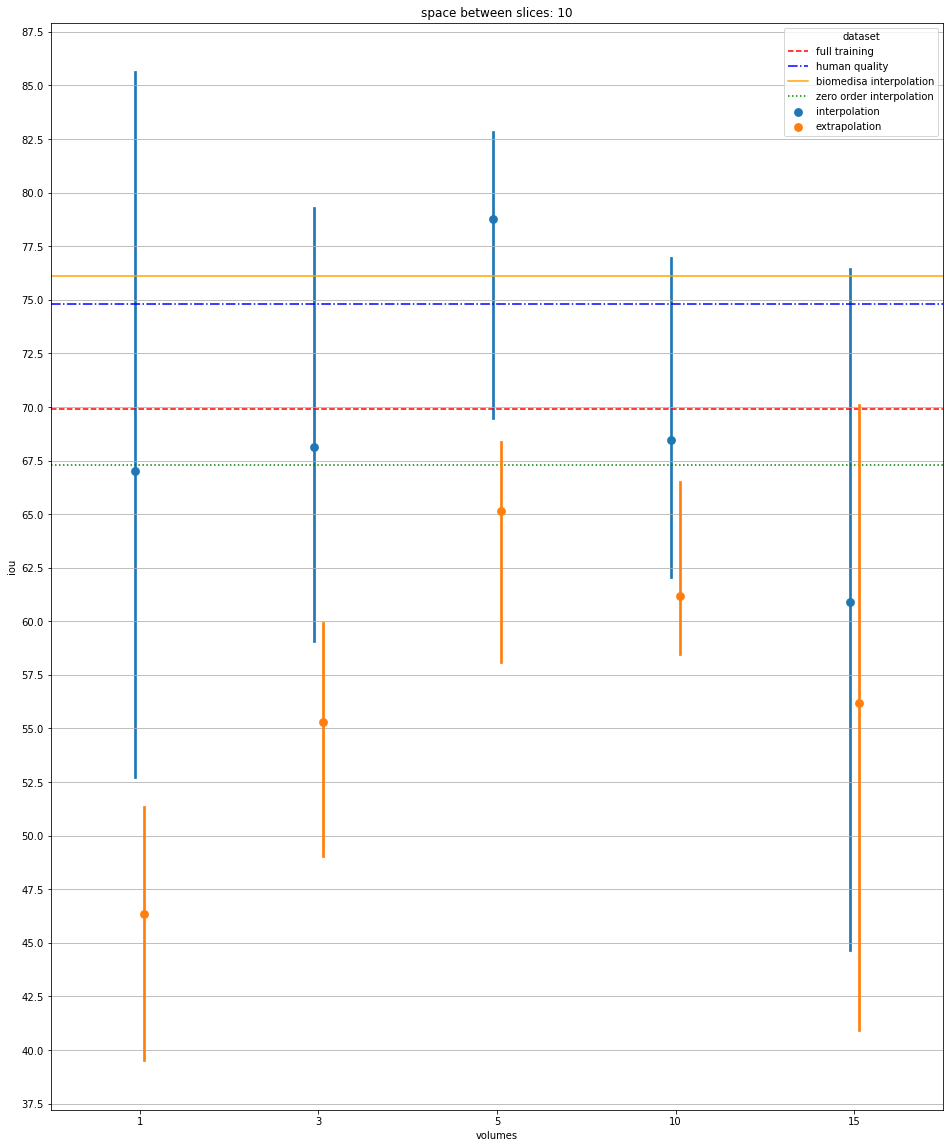

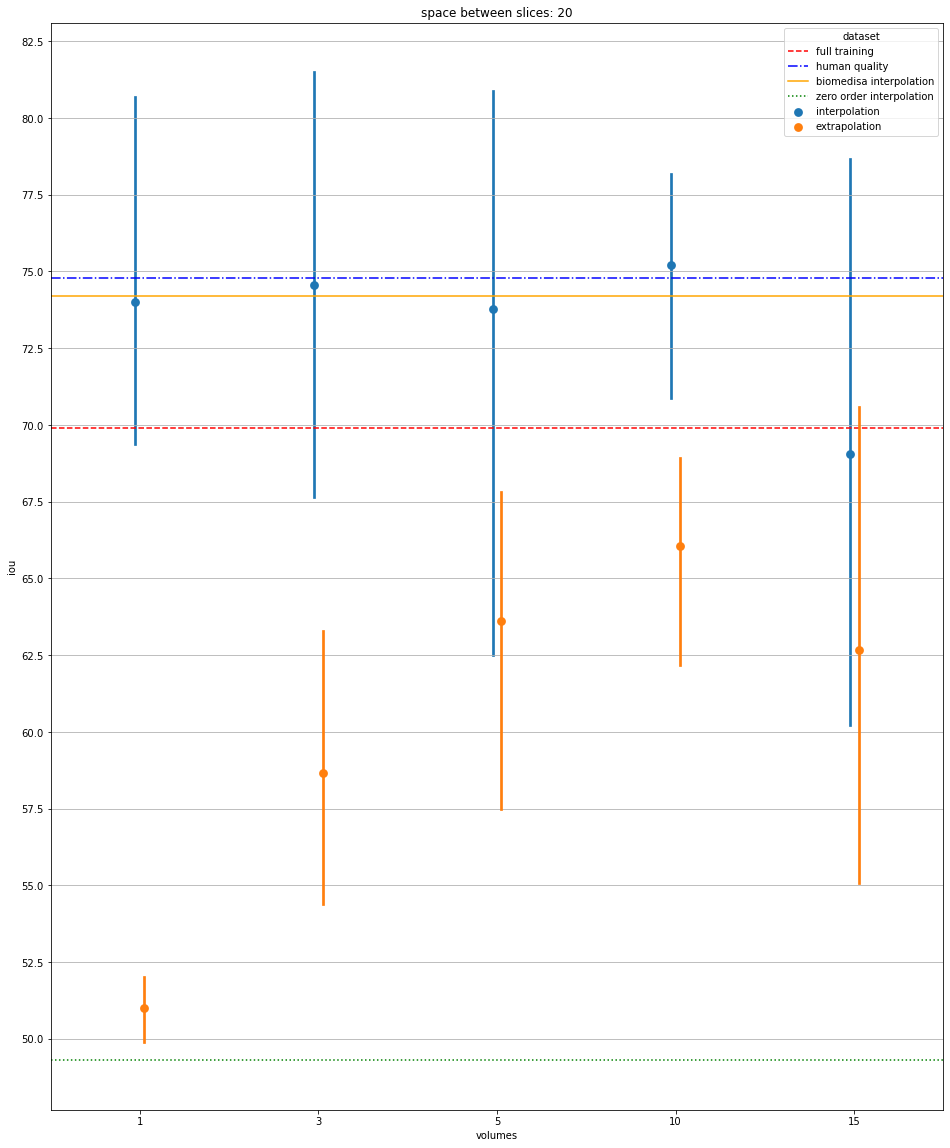

In [80]:
for spacer, all_runs in pd.DataFrame(dict_5).groupby('spacer'):
    plt.figure(figsize=(16, 20))
    plt.axhline(69.9, c='r', ls='--', label='full training')
    plt.axhline(74.8, c='b', ls='-.', label='human quality')
    plt.axhline(biomedisa_qualities[spacer], c='orange', ls='-', label='biomedisa interpolation')
    plt.axhline(zero_order_qualities[spacer], c='green', ls=':', label='zero order interpolation')
    
    plt.title(f'space between slices: {spacer}')
    sns.pointplot(data=all_runs, x='volumes', y='iou', hue='dataset',
                  dodge=True, join=False, ci=100, estimator=np.mean)
#     sns.swarmplot(data=all_runs, x='volumes',y='iou', hue='dataset') 
    loc = plticker.MultipleLocator(base=2.5) # this locator puts ticks at regular intervals
    plt.gca().yaxis.set_major_locator(loc)
    plt.grid(which='both', axis='y')
    plt.show()

In [82]:
for spacer, all_runs in pd.DataFrame(dict_5).groupby('spacer'):
    print(spacer)
    for volume, dds in all_runs[all_runs['dataset'] == 'extrapolation'].groupby('volumes'):
        print(f'${dds.iou.mean():.1f} \pm {dds.iou.std():.0f}$', end=' & ')
    print('')
    print('-'*30)

5
$52.1 \pm 5$ & $55.0 \pm 8$ & $61.6 \pm 10$ & $64.2 \pm 4$ & $65.8 \pm 5$ & 
------------------------------
10
$46.3 \pm 6$ & $55.3 \pm 5$ & $65.1 \pm 5$ & $61.2 \pm 3$ & $56.2 \pm 12$ & 
------------------------------
20
$51.0 \pm 1$ & $58.7 \pm 4$ & $63.6 \pm 5$ & $66.1 \pm 3$ & $62.7 \pm 7$ & 
------------------------------


In [29]:
f'{3.456:.0f}'

'3'

In [ ]:
calculate_volumetric_error('/mnt/data/')

In [244]:
pd.read_csv(glob((prefix+addr_base+postfix).format(volumes=3, dataset_type='infer_extrapolation'))[0])['mean-iou']

0    53.396376
Name: mean-iou, dtype: float64

In [209]:
slices_part = 0.1
selected_source = all_runs[(all_runs['pre-training'] == 'none') & (all_runs['slices_part'] == slices_part)]
selected_target = all_runs[(all_runs['pre-training'] == 'sorting-2GPU') & (all_runs['slices_part'] == slices_part)]

thr = selected_source.func.apply(lambda x: x[-1]).median()

print(selected_target.func.apply(partial(_first_touch, thr=thr)).median())
print(selected_target.func.apply(partial(_last_touch, thr=thr)).median())

26.0
39.0


In [217]:
slices_part = 0.05
selected_source = all_runs[(all_runs['pre-training'] == 'none') & (all_runs['slices_part'] == slices_part)]
selected_target = all_runs[(all_runs['pre-training'] == 'sorting') & (all_runs['slices_part'] == slices_part)]

thr = selected_source.func.apply(lambda x: x[-1]).median()

print(selected_target.func.apply(partial(_first_touch, thr=thr)).median())
print(selected_target.func.apply(partial(_last_touch, thr=thr)).median())

28.0
30.0


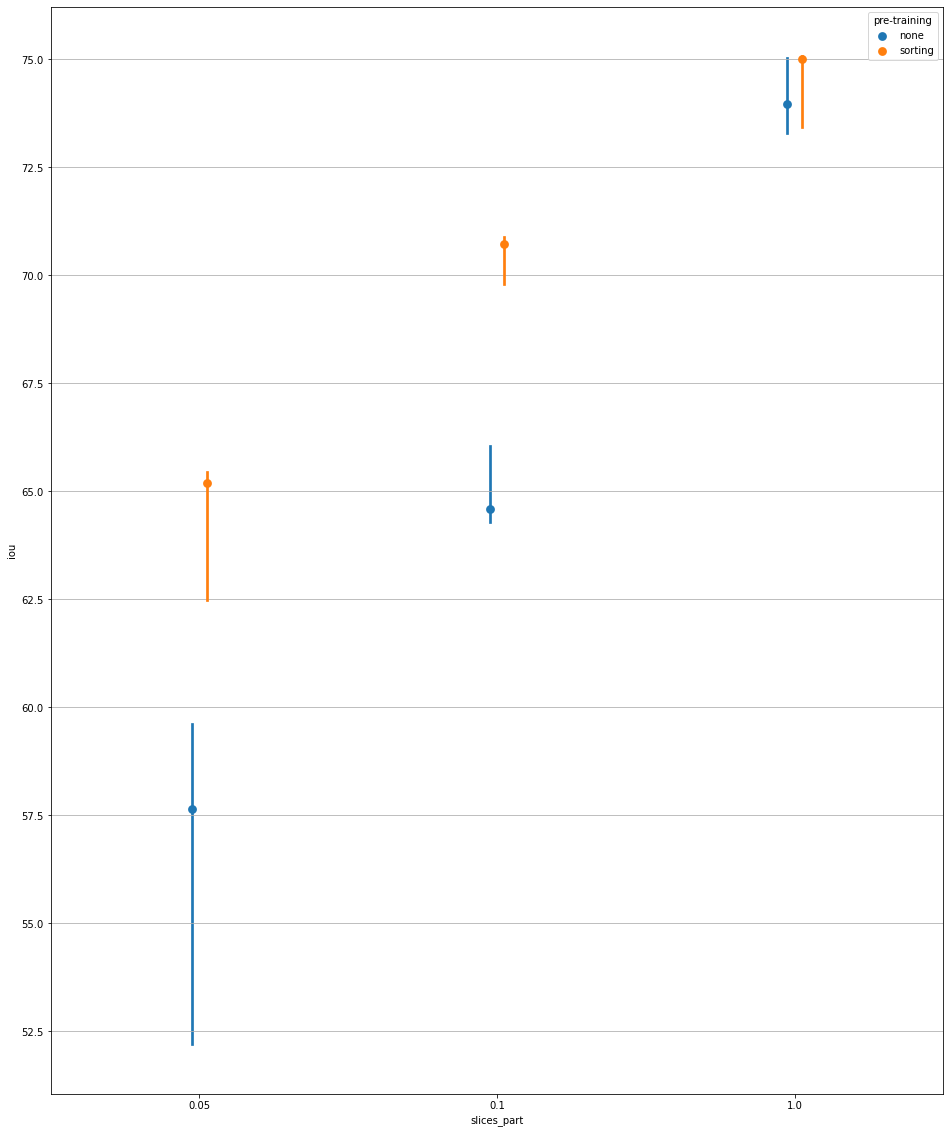

In [118]:
all_runs = []

for name, address in addresses.items():
    if isinstance(address, list):
        addresses_local = address
    else:
        addresses_local = [address]
    for address in addresses_local:
        for slc_partition in all_partitions:
            all_metrics = glob(address.format(part=slc_partition))
            for metric in all_metrics:
                with open(metric) as f:
                    metric_data = json.load(f)
                current_measure = {'pre-training': name, 
                                   'slices_part': float(slc_partition), 
                                   'iou': get_best_value_v1(metric_data),
                                   'addr': metric}
                all_runs.append(current_measure)

all_runs = pd.DataFrame(all_runs)

plt.figure(figsize=(16, 20))
sns.pointplot(data=all_runs, x='slices_part',y='iou', hue='pre-training', 
              dodge=True, join=False, ci=100, estimator=np.median)
# sns.swarmplot(data=all_runs, x='slices_part',y='iou', hue='pre-training') 
loc = plticker.MultipleLocator(base=2.5) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()

In [119]:
for (strategy, partition), ddf in all_runs.groupby(['pre-training', 'slices_part']):
    qdf = ddf[ddf.iou == ddf.iou.max()]
    print(qdf.T)
    print(qdf.addr.values[0])

                                                             17
pre-training                                               none
slices_part                                                0.05
iou                                                   59.611454
addr          /home/ws/tb0536/logs/medaka-supervised/deeplab...
/home/ws/tb0536/logs/medaka-supervised/deeplab_scratch_2021-12-14_16-19-57/1_+dataset.dataset_rebalance_kwargs.segmented_part=0.05,+experiment=eye-large-scratch-randomized,attempts=1/logdir/checkpoints/_metrics.json
                                                              6
pre-training                                               none
slices_part                                                 0.1
iou                                                    66.04933
addr          /home/ws/tb0536/logs/medaka-supervised/deeplab...
/home/ws/tb0536/logs/medaka-supervised/deeplab_scratch_2021-12-13_19-33-10/10_+dataset.dataset_rebalance_kwargs.segmented_part=0.1,+experiment=e

In [38]:
all_runs.groupby(['pre-training', 'slices_part']).std().unstack(1)

iou                              
slices_part                    0.005     0.010     0.100     1.000
pre-training                                                      
addr_sorting_nonorm_harder  0.001651  0.001480  0.214605  0.179377
none                        0.641584  0.096613  0.090805  0.098636
simclr                      0.002014  0.006860  0.180273  0.112407
sorting-2GPU                0.003933  0.224379  0.576112  0.187306

In [182]:
import tifffile
from collections import Counter

In [184]:
lens = []
for addr in glob('/mnt/LSDF/users/zharov/COVID19_1110/studies/prepared/*.tiff'):
    if len(tifffile.TiffFile(addr).pages) < 32:
        print(addr)

/mnt/LSDF/users/zharov/COVID19_1110/studies/prepared/0815.tiff
/mnt/LSDF/users/zharov/COVID19_1110/studies/prepared/0793.tiff
/mnt/LSDF/users/zharov/COVID19_1110/studies/prepared/0691.tiff
/mnt/LSDF/users/zharov/COVID19_1110/studies/prepared/0409.tiff


In [183]:
Counter(lens)

Counter({38: 92,
         50: 10,
         41: 140,
         45: 203,
         40: 124,
         39: 56,
         44: 41,
         46: 51,
         43: 94,
         42: 51,
         36: 59,
         52: 5,
         33: 20,
         35: 29,
         47: 21,
         53: 6,
         48: 23,
         51: 7,
         56: 2,
         31: 4,
         37: 37,
         57: 4,
         72: 1,
         34: 9,
         65: 1,
         32: 5,
         49: 7,
         55: 3,
         67: 1,
         54: 3,
         64: 1})

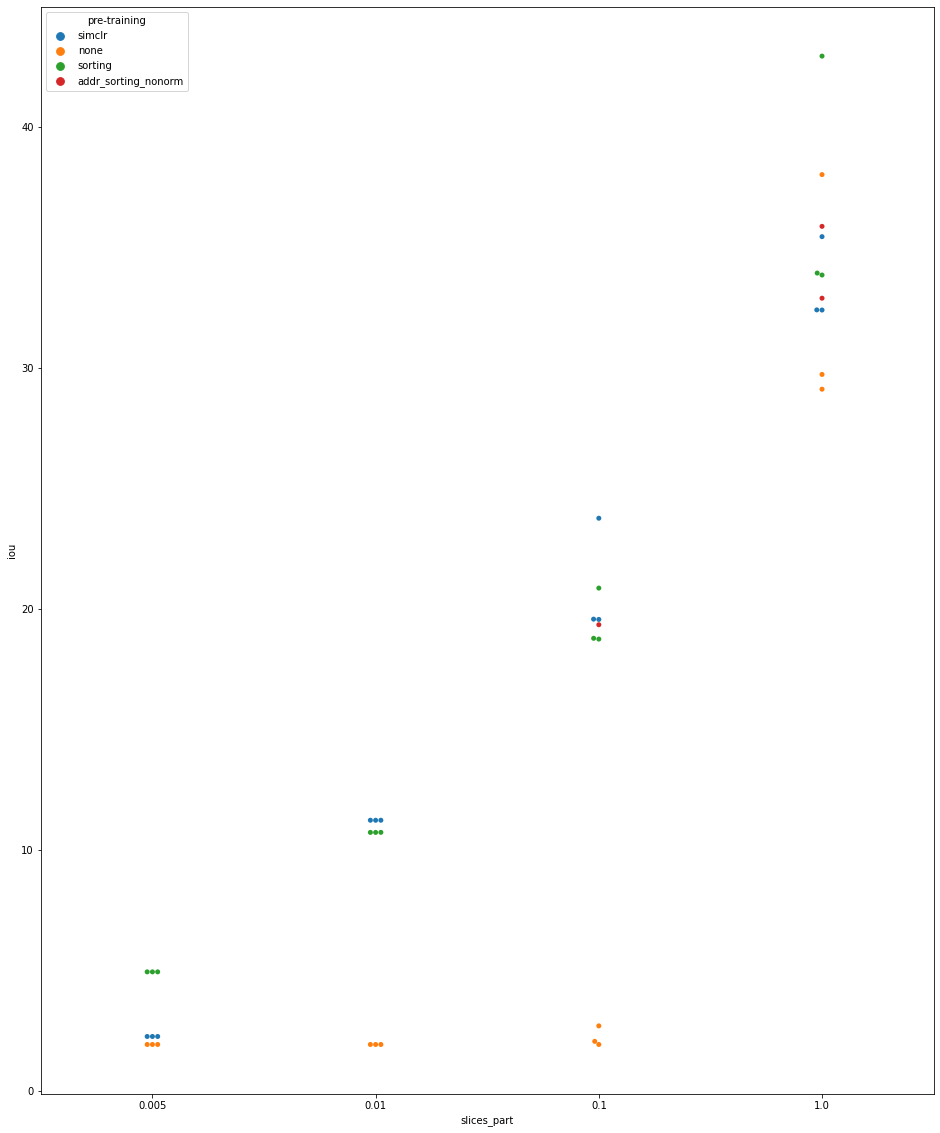

In [116]:
plt.figure(figsize=(16, 20))
# sns.boxplot(x="slices_part", y="iou", hue="pre-training", data=all_runs, width=0.1)
sns.swarmplot(x="slices_part", y="iou", hue="pre-training", data=all_runs)
# sns.pointplot(data=all_runs, x='slices_part', y='iou', hue='pre-training', ci=None, scale=0.3, marker='D')
# sns.violinplot(x="slices_part", y="iou", hue="pre-training", data=pd.DataFrame(all_runs))
plt.show()

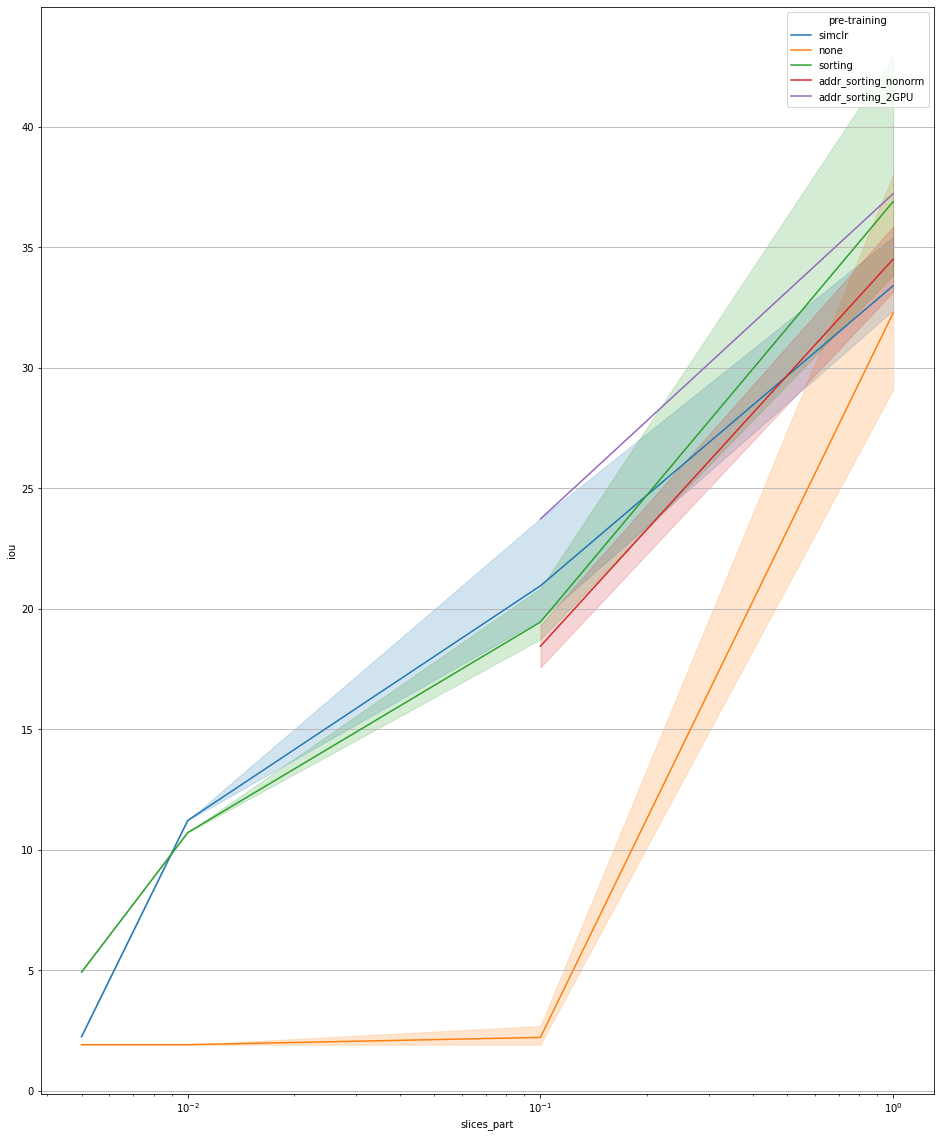

In [136]:
plt.figure(figsize=(16, 20))
grid = sns.lineplot(data=all_runs, x='slices_part', y='iou', hue='pre-training')
grid.set(xscale="log")
loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
plt.gca().yaxis.set_major_locator(loc)
plt.grid(which='both', axis='y')
plt.show()